# Image recognition with CNN

## Import dataset

In [1]:
# Create a folder for your uploads later on 
import os
if not os.path.isdir("your_images"):
    os.mkdir("your_images")

In [2]:
# Import the Red pill - blue pill data
if not os.path.isdir("AMLD2020"):
    !rm -r AMLD2020/
    !git clone https://github.com/SamurAi-sarl/AMLD2020.git
    !ls -ltr AMLD2020/*
else:
    print("Git already cloned.")


Git already cloned.


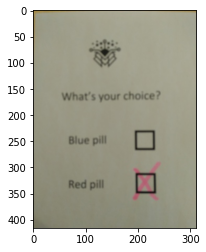

In [3]:
# Show one of the images
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io

img = io.imread("AMLD2020/quest_v2_1/img_24.jpg")
plt.imshow(img)
plt.show()

In [4]:
# Shape of one image
# (pixel rows, pixel columns, colors)
print( img.shape )

(416, 312, 3)


## Create augmented images

In [5]:
# Import Augmentor (library to create more distorted images)
!pip install Augmentor
import Augmentor

# Define a function to create augmented images
def build_augmented_images(path_folder, n_samples):
    p = Augmentor.Pipeline(path_folder)
    p.rotate(probability=0.3, max_left_rotation=4, max_right_rotation=4)
    p.zoom(probability=0.3, min_factor=0.7, max_factor=1.2)
    p.random_distortion(probability=0.3, grid_width=4, grid_height=4, magnitude=6)
    p.random_brightness(probability=0.8, min_factor=0.5, max_factor=2)
    p.random_color(probability=0.3, min_factor=0.5, max_factor=1.5)
    p.random_contrast(probability=0.3, min_factor=0.8, max_factor=1.2)

    p.sample(n_samples, multi_threaded=False)


[notice] A new release of pip available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
# Remove previous augmented images, if any (in case you run it twice) 
!rm AMLD2020/quest_v2_0/output/* 
!rm AMLD2020/quest_v2_1/output/*

# Number of augmented images
n = 1000

# Create augmented images
build_augmented_images("AMLD2020/quest_v2_0", n)
build_augmented_images("AMLD2020/quest_v2_1", n)
    

Initialised with 44 image(s) found.
Output directory set to AMLD2020/quest_v2_0/output.

Processing img_17.jpg: 100%|██████████| 1000/1000 [00:17<00:00, 56.54 Samples/s]


Initialised with 44 image(s) found.
Output directory set to AMLD2020/quest_v2_1/output.

Processing img_38.jpg: 100%|██████████| 1000/1000 [00:18<00:00, 55.30 Samples/s]


## Data Preparation

In [7]:
# Make the lists of image files
import os, glob

image_list_0 = glob.glob('AMLD2020/quest_v2_0/output/*.jpg')
image_list_1 = glob.glob('AMLD2020/quest_v2_1/output/*.jpg')

In [8]:
# Make the function that prepares the images for the training

import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean

# This function does the resize, crop and adds the image to the dataset
def img_preparation(image_list, label, X_intern, y_intern, user_img=False):

    i = 0
    for image in image_list:
        if user_img:
            image = os.path.join("your_images", image)
    
        if i%100 == 0: print("analyzing image ",i)
    
        img = io.imread(image, as_gray=True)

        img = np.array(img)

        # Resize the image
        pr = 104 #pixel rows
        pc = 78 #pixel columns
        img = resize(img, (pr, pc), anti_aliasing=True)

        # Crop the lower-right quarter of the image
        img = img[int(pr/2):,int(pc/2):]

        if i == 0:
            WIDTH, HEIGHT = np.array(img).shape
            print("image size:",WIDTH,HEIGHT)

        # Show the first 5 images
        if i < 5:
            plt.imshow(img, cmap='gray')
            plt.show()
    
        # Append the prepared images to the training dataset
        X_intern.append(img)
        y_intern.append(label)
    
        i = i+1

analyzing image  0
image size: 52 39


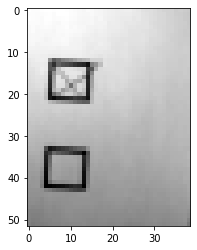

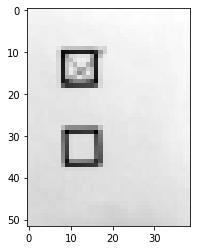

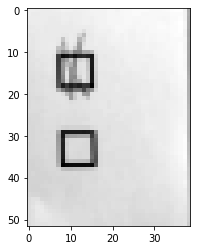

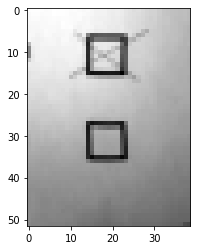

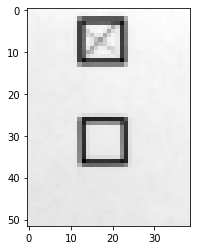

analyzing image  100
analyzing image  200
analyzing image  300
analyzing image  400
analyzing image  500
analyzing image  600
analyzing image  700
analyzing image  800
analyzing image  900
analyzing image  0
image size: 52 39


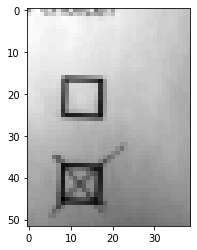

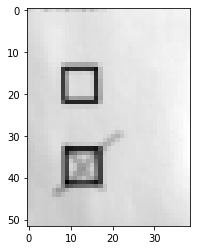

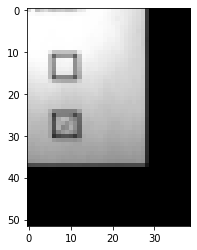

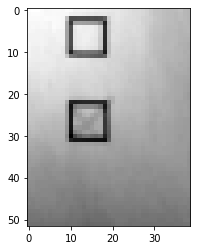

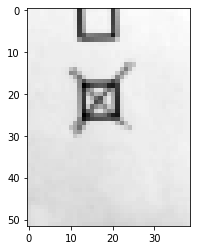

analyzing image  100
analyzing image  200
analyzing image  300
analyzing image  400
analyzing image  500
analyzing image  600
analyzing image  700
analyzing image  800
analyzing image  900


In [9]:
# Initialize the dataset
X_v0 = []
y_v0 = []

# Produce distorted images
img_preparation(image_list_0, [1,0], X_v0, y_v0)
img_preparation(image_list_1, [0,1], X_v0, y_v0)


In [10]:
# Change format of the dataset from list to numpy array
X = np.array(X_v0)
y = np.array(y_v0)

In [11]:
# Function the shows an image out of a X dataset
def show_img(X, i):
    img1 = X[i, :, :]
    img1 = img1.squeeze() * 255.
    plt.imshow(img1, cmap='gray')
    plt.show()

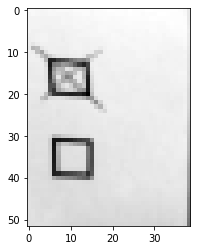

Label:  [1 0]


In [12]:
#Check few images and their labels
qw = 90
show_img(X,qw)
print("Label: ",  y[qw,:])

In [13]:
# Print X and y shapes
print(X.shape,y.shape)

(2000, 52, 39) (2000, 2)


In [14]:
# Print X and y values
print("X",X)
print("y",y)

X [[[0.58625714 0.58276258 0.58264261 ... 0.4906463  0.48587092 0.48129353]
  [0.58259201 0.58244332 0.58177285 ... 0.48634532 0.48133876 0.47717355]
  [0.58524753 0.58248888 0.58177489 ... 0.48864991 0.48056699 0.47836422]
  ...
  [0.33994509 0.33536009 0.33481057 ... 0.37007416 0.37374231 0.36331152]
  [0.33725527 0.32867342 0.33159718 ... 0.36514108 0.37020353 0.34257897]
  [0.33256212 0.32370902 0.32661802 ... 0.3595774  0.36251696 0.32227995]]

 [[0.60575444 0.60630841 0.60609832 ... 0.62118829 0.62216397 0.62221961]
  [0.6057616  0.60596051 0.60563964 ... 0.62191366 0.62259528 0.62212292]
  [0.60466357 0.60279223 0.60227084 ... 0.62443948 0.62556279 0.62169759]
  ...
  [0.55175724 0.55216386 0.55232529 ... 0.57010928 0.57336587 0.57071351]
  [0.55245817 0.55126507 0.55106321 ... 0.56414196 0.57067336 0.57081763]
  [0.5526633  0.55132178 0.55135555 ... 0.56284825 0.56534498 0.56551708]]

 [[0.56585033 0.5647236  0.56417145 ... 0.59382736 0.5724283  0.44569313]
  [0.56480565 0.5603

## Split the dataset: train and test

In [15]:
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the dataset into a train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('X_train shape: ',X_train.shape)

# Reshape the dataset
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print('X_train shape: ',X_train.shape)
print('Dataset is ready!')

X_train shape:  (1600, 52, 39)
X_train shape:  (1600, 52, 39, 1)
Dataset is ready!


## Model definition

In [16]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

def define_model(num_classes,epochs):
    # Create the model
    model = Sequential()

    # Layer 1 (Convolutional)
    model.add(Conv2D(8, (5, 5), input_shape=(X.shape[1], X.shape[2], 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2 (Convolutional)
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3 (Convolutional)
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Additional Convolutional layers
    # ...

    # Additional Dense Layers    
    model.add(Flatten())
    # model.add(Dense(6, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(num_classes, activation='softmax'))
 
    # Define the optimizer
    #lrate = 0.005
    #decay = lrate/epochs
    #sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    #adam = Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False)
    adam = Adam()
    
    # Prepares the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    print(model.summary())
    
    return model


2023-04-02 21:43:19.923053: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 21:43:19.986293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 21:43:19.987137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 21:43:21.041903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
# Define the number duration of the training process
# In each epoch the model learns once the whole dataset
epochs = 25

#Create the model
model=define_model(2,epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 52, 39, 8)         208       
                                                                 
 dropout (Dropout)           (None, 52, 39, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 19, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 19, 8)         584       
                                                                 
 dropout_1 (Dropout)         (None, 26, 19, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 9, 8)         0         
 2D)                                                    

## Training

In [18]:
# Train the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Train on 1600 samples, validate on 400 samples
Epoch 1/25


2023-04-02 21:43:22.804718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-04-02 21:43:22.839338: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/conv2d_1/kernel/v/Assign' id:472 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv2d_1/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv2d_1/kernel/v, training/Adam/conv2d_1/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


1568/1600 [============================>.] - ETA: 0s - loss: 0.6902 - acc: 0.5453

/opt/conda/lib/python3.9/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-04-02 21:43:25.979681: W tensorflow/c/c_api.cc:300] Operation '{name:'loss/mul' id:217 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6901 - acc: 0.5475 - val_loss: 0.6920 - val_acc: 0.5275
Epoch 2/25
1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6852 - acc: 0.5725 - val_loss: 0.6859 - val_acc: 0.5450
Epoch 3/25
1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6804 - acc: 0.5644 - val_loss: 0.6825 - val_acc: 0.5475
Epoch 4/25
1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6696 - acc: 0.5756 - val_loss: 0.6804 - val_acc: 0.5475
Epoch 5/25
1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6626 - acc: 0.5844 - val_loss: 0.6731 - val_acc: 0.5775
Epoch 6/25
1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6455 - acc: 0.6263 - val_loss: 0.6540 - val_acc: 0.6500
Epoch 7/25
1600/1600 [==============================] - 3s 2ms/sample - loss: 0.6254 - acc: 0.6469 - val_loss: 0.6499 - val_acc: 0.5950
Epoch 8/25
1600/1600 [==============================] - 3s 

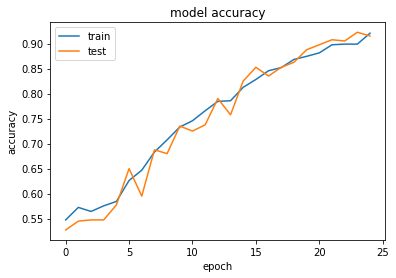

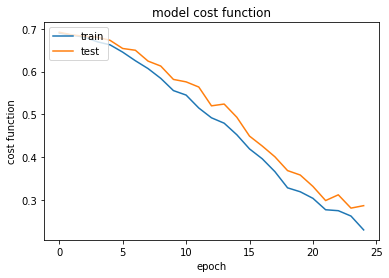

______________________________
Test Sample Accuracy: 91.50%
______________________________


In [19]:
# Plot accuracy vs epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Plot cost function vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model cost function')
plt.ylabel('cost function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("______________________________")
print("Test Sample Accuracy: %.2f%%" % (scores[1]*100))
print("______________________________")
# Save the model to a json file
model_json = model.to_json()
with open("model_face_v1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_face_v1.h5")

## Model preditions

In [20]:
# Predictions  on the test sample
p_test = (model.predict(X_test)>0.5).astype('int32')

# Predictions on the test sample
p_train = (model.predict(X_train)>0.5).astype('int32')

from sklearn.metrics import confusion_matrix

print('Confusion matrix for train sample')
print(confusion_matrix(y_train[:,0], p_train[:,0]))

print('Confusion matrix for test sample')
print(confusion_matrix(y_test[:,0], p_test[:,0]))


/opt/conda/lib/python3.9/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-04-02 21:44:42.307140: W tensorflow/c/c_api.cc:300] Operation '{name:'dense/Softmax' id:141 op device:{requested: '', assigned: ''} def:{{{node dense/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Confusion matrix for train sample
[[740  39]
 [ 29 792]]
Confusion matrix for test sample
[[199  22]
 [ 12 167]]


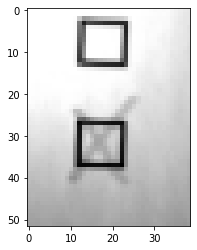

Label:        [0 1]
Prediction:   [0 1]


In [21]:
qw = 75
show_img(X_test,qw)
print("Label:       ",y_test[qw,:])
print("Prediction:  ",p_test[qw,:])

## Optimization

* The final goal:
optimize the model to have the highest accuracy on the test set (Test Sample Accuracy)

* Parameters to vary:
  * Resize and cropping
  * Number of augmented images
  * Epochs
  * For Convolutional layers:
    * Number of Conv layers
    * Number of filters in a layer
    * Size of layers (3x3, 5x5, ...)
    * Activation functions

* Rule of thumb: number of parameters of the model should be lower than the training set size.

## Try with your own scans

Add your images in the "your_images" folder as .jpg or .jpeg

In [22]:
# List of the uploaded files
image_list_test = os.listdir('your_images/')
image_list_test = [img for img in image_list_test if img.endswith(".jpg") or img.endswith(".jpeg")]

if len(image_list_test) == 0:
    print("No images found.")
    assert False

print(image_list_test)

['img_10.jpg', 'img_1.jpg']


analyzing image  0
image size: 52 39


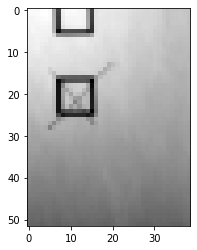

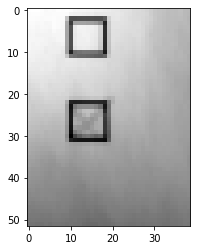

In [23]:
# Initialize the test dataset
X_test2 = []
y_test2 = []

# Prepare images and append to the dataset
img_preparation(image_list_test, [], X_test2, y_test2, True)

In [24]:
# Prepare the dataset
X_test2 = np.array(X_test2)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], X_test2.shape[2], 1)

# Get the predictions
p_test2 = (model.predict(X_test2)>0.5).astype('int32')
print(p_test2)

[[0 1]
 [0 1]]


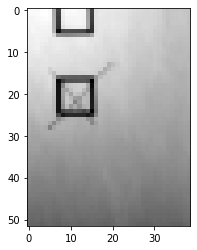

Prediction:   [0 1]
_______________________


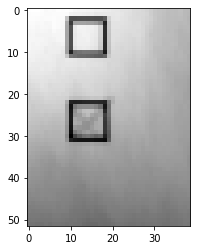

Prediction:   [0 1]
_______________________


In [25]:
# Loop over the uploaded images and show predictions
for i in range(0,len(image_list_test)):
  show_img(X_test2,i)
  print("Prediction:  ",p_test2[i,:])
  print("_______________________")

-----------